# Agents with LlamaIndex I - Data Agents

Sources [1](https://docs.llamaindex.ai/en/stable/module_guides/deploying/agents/), [2](https://docs.llamaindex.ai/en/stable/understanding/putting_it_all_together/agents/), [3](https://docs.llamaindex.ai/en/stable/examples/agent/custom_agent/), [4](https://docs.llamaindex.ai/en/stable/examples/agent/openai_agent/), [5](https://docs.llamaindex.ai/en/stable/module_guides/deploying/agents/agent_runner/), [6](https://medium.com/llamaindex-blog/data-agents-eed797d7972f), [7](https://akash-mathur.medium.com/advanced-rag-query-augmentation-for-next-level-search-using-llamaindex-d362fed7ecc3)    

Data Agents, empowered by LLMs are knowledge workers within LlamaIndex, designed to interact with various types of data. These agents can handle both unstructured and structured data, significantly enhancing the capabilities beyond traditional query/chat engines.

![](https://miro.medium.com/v2/resize:fit:1000/format:webp/1*cWwW01Ez_JIS2hcMJwcV8Q.png)  

Here's a high level overview about it:

+ Functionality: Data Agents can autonomously conduct searches and retrieve information across unstructured, semi-structured, and structured data. They are not limited to just reading data; they can also write, modify, and store information by integrating with external service APIs.

+ Dynamic Interaction: Unlike static query/chat engines, Data Agents can dynamically interact with data sources. They can ingest new data and adapt based on the information they process, offering a more flexible and responsive approach to data management.

Building a data agent requires the following core components:

1. Reasoning loop
2. Tool abstractions

![](https://miro.medium.com/v2/resize:fit:1000/format:webp/1*WPOS7tiljXCrd3IkJy84CQ.png)  

A data agent is initialized with set of APIs, or Tools, to interact with; these APIs can be called by the agent to return information or modify state. Given an input task, the data agent uses a reasoning loop to decide which tools to use, in which sequence, and the parameters to call each tool.

---

1. Reasoning Loop - The reasoning loop depends on the type of agent, as following:
    + ReAct agent (works across any chat/text completion endpoint). - [Video](https://www.youtube.com/watch?v=pRUc6JPw6CY), [Code](https://colab.research.google.com/drive/1XYNaGvEdyKVbs4g_Maffyq08DUArcW8H?usp=sharing)  
    + Function Calling Agents (integrates with any function calling LLM) - [Video](https://www.youtube.com/watch?v=6INvyrC4WrA), [Code](https://colab.research.google.com/drive/1GyPRMiwxS7rKxKpRt4r-ckYfmAw2GxdQ?usp=sharing)  
    + "Advanced Agents": 
        + Retrieval Augmented Function Calling Agent - [Video](https://www.youtube.com/watch?v=K7h17Jjtbzg), [Code](https://colab.research.google.com/drive/1R41zIhVybCNqg67eVEPuyLeMp_HYwTlA?usp=sharing)  
        + Controlling Agent Reasoning Loop - [Video](https://www.youtube.com/watch?v=gFRbkRtLGZQ), [Code](https://colab.research.google.com/drive/1c5ORIlqs3YMWosDSMgs6_ZHb5eiANS1c?usp=sharing)  
        + StepWise Controllable Agent - [Video](https://www.youtube.com/watch?v=JGkSxdPFgyQ), [Code](https://colab.research.google.com/drive/1x-CR_KA7LzhPhLdITycojAJVamEaKsaO?usp=sharing)  
        + [LLMCompiler](https://llamahub.ai/l/llama-packs/llama-index-packs-agents-llm-compiler?from=)  
        + [Chain-of-Abstraction](https://llamahub.ai/l/llama-packs/llama-index-packs-agents-coa?from=)  
        + [Language Agent Tree Search](https://llamahub.ai/l/llama-packs/llama-index-packs-agents-lats?from=)  
        + and more...

---

2. Tool Abstractions - At their core, tool abstractions allow for a structured way to define how Data Agents can interact with data or services. Unlike typical APIs designed for human users, these tools are optimized for automated interactions, enabling agents to execute tasks with precision and efficiency.

Types of Tools:

+ FunctionTool - A function tool allows users to easily convert any user-defined function into a Tool. It can also auto-infer the function schema.
+ QueryEngineTool - A tool that wraps an existing query engine. 

[LlamaHub Tools](https://llamahub.ai/?tab=tools)  
    
--- 

## Installing Packages

In [ ]:
!pip install -qU pydantic
!pip install -q llama-index
!pip install -q llama-index-experimental
!pip install -qU llama-index-llms-openai
!pip install -qU llama-index-llms-ollama
!pip install -qU llama-index-embeddings-ollama
!pip install -qU llama_index.embeddings.huggingface
!pip install -qU llama-index-question-gen-openai
!pip install -qU llama-index-agent-openai
!pip install -qU pypdf
!pip install -qU docx2txt
!pip install -qU pip
!pip install -qU openai
!pip install -qU google-genai
!pip install python-dotenv

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llama-index-llms-ollama 0.9.1 requires llama-index-core<0.15,>=0.14.5, but you have llama-index-core 0.12.52.post1 which is incompatible.
llama-index-readers-file 0.5.6 requires llama-index-core<0.15,>=0.13.0, but you have llama-index-core 0.12.52.post1 which is incompatible.
llama-index 0.14.12 requires llama-index-core<0.15.0,>=0.14.12, but you have llama-index-core 0.12.52.post1 which is incompatible.
llama-index 0.14.12 requires llama-index-llms-openai<0.7,>=0.6.0, but you have llama-index-llms-openai 0.3.44 which is incompatible.
llama-index-embeddings-huggingface 0.6.1 requires llama-index-core<0.15,>=0.13.0, but you have llama-index-core 0.12.52.post1 which is incompatible.
llama-index-indices-managed-llama-cloud 0.9.4 requires llama-index-core<0.15,>=0.13.0, but you have llama-index-core 0.12.52.post1 whic

## Importing Packages

In [ ]:
import os
import sys
import shutil
import glob
import logging
from pathlib import Path
from IPython.display import Image
import pydantic
from dotenv import load_dotenv
import openai
from google import genai

import warnings
warnings.filterwarnings('ignore')
import logging
#logging.basicConfig(stream=sys.stdout, level=logging.DEBUG)
#logging.getLogger().addHandler(logging.StreamHandler(stream=sys.stdout))

import pandas as pd

## Llamaindex LLMs
from llama_index.llms.openai import OpenAI

## Llamaindex readers
from llama_index.core import SimpleDirectoryReader

## LlamaIndex Index Types
from llama_index.core import ListIndex
from llama_index.core import VectorStoreIndex
from llama_index.core import TreeIndex
from llama_index.core import KeywordTableIndex
from llama_index.core import SimpleKeywordTableIndex
from llama_index.core import DocumentSummaryIndex
from llama_index.core import SummaryIndex
from llama_index.core import KnowledgeGraphIndex
from llama_index.core.query_engine import PandasQueryEngine

## LlamaIndex Context Managers
from llama_index.core import StorageContext
from llama_index.core import load_index_from_storage
from llama_index.core.response_synthesizers import get_response_synthesizer
from llama_index.core.response_synthesizers import ResponseMode
from llama_index.core.schema import Node
from llama_index.core import Settings

## LlamaIndex Templates
from llama_index.core.prompts import PromptTemplate
from llama_index.core.prompts import ChatPromptTemplate
from llama_index.core.base.llms.types import ChatMessage, MessageRole

## LlamaIndex Agents
from llama_index.core.tools import FunctionTool
from llama_index.core.agent import ReActAgent

## LlamaIndex Callbacks
from llama_index.core.callbacks import CallbackManager
from llama_index.core.callbacks import LlamaDebugHandler

import nest_asyncio
nest_asyncio.apply()

load_dotenv("../../.env", override=True)

True

In [6]:
#os.environ["OPENAI_API_KEY"] = "<the key>"
#openai.api_key = os.environ["OPENAI_API_KEY"]
openai.api_key = os.getenv('OPENAI_API_KEY')
client = openai.OpenAI()

# 1st. Example - [Router Engine](https://docs.llamaindex.ai/en/stable/module_guides/querying/router/)  

![](https://miro.medium.com/v2/resize:fit:1000/1*pwwxzWABv4cJDWonJ7LImg.png)

A Router Query Engine serves as a powerful decision-making module that plays a crucial role in selecting the most appropriate choices based on user queries and metadata-defined options. These routers are versatile modules that can operate independently as “selector modules” or can be utilized as query engines or retrievers on top of other query engines or retrievers.

Routers excel in various use cases, including selecting the appropriate data source from a diverse range of options and deciding whether to perform summarization or semantic search based on the user query. They can also handle more complex tasks like trying out multiple choices simultaneously and combining the results using multi-routing capabilities.

We also define a “selector”. Users can easily employ routers as query engines or retrievers, with the router taking on the responsibility of selecting query engines or retrievers to route user queries effectively.

Steps:  
+ The source document is indexed with sentence splitting with a fixed window size
+ Create summary and vector indexes
+ From indices, we obtain query engines, respectively
+ Bind all search engines to the agents as tools
+ The agent will choose a tool based on the overall prompts
+ Query on the agent.

#### Defining Models

In [7]:
from llama_index.core import Settings
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding

#model="gpt-4o"
#model="gpt-4o-mini"
model="gpt-5-nano"

Settings.embed_model = OpenAIEmbedding(model="text-embedding-ada-002")
Settings.llm = OpenAI(temperature=0, 
                      model=model, 
                      #max_tokens=512
                      PRESENCE_PENALTY=-2,
                      TOP_P=1,
                     )

#### Defining Folders

In [8]:
DOCS_DIR = "../../Data/"
PERSIST_DIR = "../../Index/"

print(f"Current dir: {os.getcwd()}")

if not os.path.exists(DOCS_DIR):
  os.mkdir(DOCS_DIR)
docs = os.listdir(DOCS_DIR)
docs = [d for d in docs]
docs.sort()
print(f"Files in {DOCS_DIR}")
for doc in docs:
    print(doc)

Current dir: /home/renato/Documents/Repos/GenAI4Humanists/Notebooks/LlamaIndex
Files in ../../Data/
.ipynb_checkpoints
RAG_images
Vienna_dataset.json
csv
hr.sqlite
html
imgs
mp3
new_rag_dataset.json
pdf
txt


## Load Data  
A single file

In [9]:
#### To download this paper, below is the needed code:
#!wget "https://openreview.net/pdf?id=VtmBAGCN7o" -O ../Data/metagpt.pdf

In [11]:
documents = SimpleDirectoryReader(input_files=[f"{DOCS_DIR}/pdf/metagpt.pdf"]).load_data()

In [12]:
from llama_index.core.node_parser import SentenceSplitter

splitter = SentenceSplitter(chunk_size=1024)
nodes = splitter.get_nodes_from_documents(documents)

In [13]:
print(len(nodes))
nodes[0]

34


TextNode(id_='8709609d-c090-4d9e-ab06-5df81c5fc0f8', embedding=None, metadata={'page_label': '1', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'creation_date': '2025-04-04', 'last_modified_date': '2025-04-04'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={<NodeRelationship.SOURCE: '1'>: RelatedNodeInfo(node_id='f9a79b73-6f40-465b-83ab-66ad1e2e5320', node_type=<ObjectType.DOCUMENT: '4'>, metadata={'page_label': '1', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'creation_date': '2025-04-04', 'last_modified_date': '2025-04-04'}, hash='82849e4360c4baae19e4d2e3117dbae7822a1e9442dd6a156a2d1582674eb66c')}, m

## Define Summary Index and Vector Index over the Same Data

In [14]:
#from llama_index.core import SummaryIndex, VectorStoreIndex

summary_index = SummaryIndex(nodes)
vector_index = VectorStoreIndex(nodes)

2026-01-16 01:15:36,430 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


## Define Query Engines Tools and Set Metadata for each Tool

In [15]:
summary_query_engine = summary_index.as_query_engine(response_mode="tree_summarize", 
                                                     use_async=True,)

vector_query_engine = vector_index.as_query_engine(similarity_top_k=3,
                                                   retriever_mode="embedding",
                                                   response_mode="compact",
                                                   verbose=True)

In [16]:
from llama_index.core.tools import QueryEngineTool

summary_tool = QueryEngineTool.from_defaults(
    query_engine=summary_query_engine,
    description=("Useful for summarization questions related to MetaGPT"),
)

vector_tool = QueryEngineTool.from_defaults(
    query_engine=vector_query_engine,
    description=("Useful for retrieving specific context from the MetaGPT paper."),
)

## Define Router Query Engine to use Tools

In [17]:
from llama_index.core.query_engine.router_query_engine import RouterQueryEngine
from llama_index.core.selectors import LLMSingleSelector

query_engine = RouterQueryEngine(
    selector=LLMSingleSelector.from_defaults(),
    query_engine_tools=[summary_tool, vector_tool,],
    verbose=True
)

## Testing

In [18]:
response = query_engine.query("What is the summary of the document?")
print(str(response))

2026-01-16 01:16:00,145 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-16 01:16:00,193 - INFO - Selecting query engine 0: Because the question asks for the summary, and option 1 is specifically about summarization questions related to MetaGPT..


Selecting query engine 0: Because the question asks for the summary, and option 1 is specifically about summarization questions related to MetaGPT..


2026-01-16 01:16:12,902 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Summary

MetaGPT presents a meta-programming framework that enables robust collaboration among multiple large language model (LLM)–driven agents by embedding human-like Standard Operating Procedures (SOPs) into the workflow. The framework emphasizes role specialization, structured outputs, and efficient inter-agent communication to solve complex tasks (especially software development) more reliably than prior chat-based agent systems.

Key ideas and components
- Roles and SOPs: Defines specialized agent roles (Product Manager, Architect, Project Manager, Engineer, QA Engineer) with clear goals, constraints, and outputs. Tasks are decomposed and handed off through a standardized SOP-driven process.
- Structured communication: Replaces free-form dialogue with documents and diagrams (system designs, PRDs, flow diagrams) and a publish-subscribe memory pool to share and filter information, improving clarity and reducing miscommunication.
- Executable feedback: Introduces a runtime feedback 

In [19]:
print(len(response.source_nodes))

34


In [20]:
response = query_engine.query("How do agents share information with other agents?")
print(str(response))

2026-01-16 01:16:22,858 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-16 01:16:23,078 - INFO - Selecting query engine 1: The question about how agents share information aligns more with retrieving specific context from the MetaGPT paper (choice 2) than with general summarization (choice 1)..


Selecting query engine 1: The question about how agents share information aligns more with retrieving specific context from the MetaGPT paper (choice 2) than with general summarization (choice 1)..


2026-01-16 01:16:23,381 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:16:27,704 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


- Through a global, shared message pool where agents publish structured messages.
- Agents can directly retrieve and access messages from the pool to obtain needed information.
- A role-based subscription mechanism filters information, so each agent receives only task-relevant messages based on their profile.


In [21]:
print(len(response.source_nodes))

3


# 2nd. Example - [Sub Question Query Engine](https://docs.llamaindex.ai/en/stable/examples/query_engine/sub_question_query_engine/)  

[Source data](https://docs.llamaindex.ai/en/latest/examples/usecases/10k_sub_question/)

Normal query engines are designed to locate relevant information within vast datasets. They act as intermediaries between users’ questions and stored data. When a user poses a query, the engine carefully analyzes it, pinpoints relevant data, and presents a comprehensive response.  

While traditional query engines excel at straightforward questions, they often face challenges when confronted with multi-faceted questions spanning multiple documents. Simply merging documents and extracting top k elements frequently fails to capture the nuances required for truly informative responses.  

Decomposition Strategy: To address this complexity, Sub-Question Query Engines adopt a divide-and-conquer approach. They elegantly decompose complex queries into a series of sub-questions, each targeting specific aspects of the original inquiry.  

The implementation involves defining a Sub-Question Query Engine for each data source. Instead of treating all documents equally, the engine strategically addresses sub-questions specific to each data source. To generate the final response, a top-level Sub-Question Query Engine is then employed to synthesize the results from individual sub-questions.  

Given the initial complex question, we use LLM to generate sub-questions and execute sub-questions on selected data sources. It gathers all sub-responses and then synthesizes the final response.  

Sub-Question Query Engine focuses on the divide-and-conquer approach. It decomposes a complex query into a series of smaller, focused sub-questions. Each sub-question is sent to a dedicated Sub-Question Query Engine that retrieves relevant information from its specific data source. Hence, it ensures each sub-question gets the appropriate data source, leading to more precise results. It provides comprehensive answers by aggregating insights from various sub-questions to provide a holistic response.  

In [22]:
#from llama_index.core.tools import QueryEngineTool
from llama_index.core.tools import ToolMetadata
from llama_index.core.query_engine import SubQuestionQueryEngine

#### Load data

In [24]:
lyft_docs = SimpleDirectoryReader(input_files=[f"{DOCS_DIR}/pdf/lyft_2021.pdf"]).load_data()
uber_docs = SimpleDirectoryReader(input_files=[f"{DOCS_DIR}/pdf/uber_2021.pdf"]).load_data()

#### Build indices

In [25]:
lyft_index = VectorStoreIndex.from_documents(lyft_docs)
uber_index = VectorStoreIndex.from_documents(uber_docs)

2026-01-16 01:17:39,409 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:17:42,515 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:17:46,415 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:17:51,498 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:17:55,404 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:18:02,970 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:18:06,300 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:18:11,802 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


#### Build query engines

In [26]:
lyft_engine = lyft_index.as_query_engine(similarity_top_k=3,
                                         retriever_mode="embedding",
                                         response_mode="compact",
                                         verbose=True)

uber_engine = uber_index.as_query_engine(similarity_top_k=3,
                                         retriever_mode="embedding",
                                         response_mode="compact",
                                         verbose=True)

In [31]:
query_engine_tools = [
    QueryEngineTool(
        query_engine=lyft_engine,
        metadata=ToolMetadata(
            name="lyft",
            description=(
                "Provides information about Lyft financials for year 2021"
            ),
        ),
    ),
    QueryEngineTool(
        query_engine=uber_engine,
        metadata=ToolMetadata(
            name="uber",
            description=(
                "Provides information about Uber financials for year 2021"
            ),
        ),
    ),
]

s_engine = SubQuestionQueryEngine.from_defaults(query_engine_tools=query_engine_tools)

#### Run queries

In [32]:
response = s_engine.query("Compare and contrast the customer segments and geographies that grew the fastest")

2026-01-16 01:21:20,897 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Generated 9 sub questions.
[lyft] Q: For Lyft in 2021, which geographic region showed the fastest revenue growth and what was the growth rate?
[lyft] Q: For Lyft in 2021, which customer-facing segments/products grew the fastest in terms of revenue or bookings (e.g., standard rides, Lyft Lux, Lyft Shared, Platform/Other)?
[lyft] Q: Did Lyft's active rider base grow fastest in a particular geography in 2021?
[lyft] Q: In Lyft's 2021 results, did international markets grow faster than North America, and by how much?
[uber] Q: For Uber in 2021, which geographic region had the fastest revenue growth and what was the growth rate?
[uber] Q: For Uber in 2021, which segments (Rides, Eats, Freight) grew the fastest in terms of revenue or gross bookings?
[uber] Q: In 2021, did Uber Eats growth outpace Uber Rides growth, and in which geographies was this most pronounced?
[uber] Q: Which international markets contributed the most to Uber's growth in 2021 by revenue or orders?
[uber] Q: Did Uber sho

2026-01-16 01:21:21,703 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:21:21,891 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:21:22,082 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:21:22,187 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:21:22,285 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:21:22,743 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:21:22,911 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:21:22,918 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:21:23,479 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:21:43,031 - INFO - HTTP

[lyft] A: The information given does not specify any geography where the active rider base grew fastest in 2021. It only notes overall growth and increases in Active Riders, with some regional context about reopening, but no geography-by-geography breakdown.


2026-01-16 01:21:44,280 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[lyft] A: The provided excerpts do not include a regional growth breakdown by geography, so I can’t determine whether international markets grew faster than North America or by how much. If you share the geographic revenue growth figures (e.g., by region), I can compute the comparison.


2026-01-16 01:21:45,516 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[uber] A: Sao Paulo, Brazil and London, United Kingdom.


2026-01-16 01:21:46,515 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-16 01:21:47,686 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[uber] A: Asia Pacific (APAC) had the fastest growth, with revenue up about 138% year over year (from $1,147 million in 2020 to $2,731 million in 2021).
[uber] A: No. The material does not report any geography-specific faster growth in active users for 2021. It notes geographic concentration (23% of Mobility Gross Bookings from five metro areas: Chicago, Miami, NYC, São Paulo, London) and trips to/from airports, but does not provide geography-by-geometry growth rates for active users.


2026-01-16 01:21:49,057 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-16 01:21:49,193 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[lyft] A: The provided information does not specify growth rates by customer-facing segment for 2021, so it’s not possible to identify which segment grew the fastest in terms of revenue or bookings.

Segments mentioned:
- Ridesharing Marketplace
- Express Drive
- Lyft Rentals
- Light Vehicles
- Public Transit
- Lyft Autonomous

If you can share section(s) with segment-level financials or bookings data, I can determine the fastest-growing segment.
[lyft] A: The provided material does not include a geographic breakdown of revenue by region, so I can’t determine which region had the fastest growth or its rate. If you share the section with revenue by geography, I can extract the answer.


2026-01-16 01:21:58,562 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[uber] A: Yes. Uber Eats growth was much stronger in 2021 than Uber Rides growth. Delivery (Eats) revenue rose from $3.904B in 2020 to $8.362B in 2021, up about 114%. Mobility (Rides) revenue rose from $6.089B to $6.953B, up about 14%.

Geographies: The available data shows total revenue by region for 2021 but does not break out growth by offering in each region. Therefore, we cannot determine which geographies saw Eats growth outpacing Rides growth. For context, total 2021 revenue by region was: United States and Canada $10.094B, Europe, Middle East and Africa $3.213B, Asia Pacific $2.731B, Latin America $1.417B.


2026-01-16 01:22:02,542 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[uber] A: - By revenue growth (2020 → 2021):
  - Eats (Delivery): +114% (3,904 → 8,362)
  - Freight: +111% (1,011 → 2,132)
  - Rides (Mobility): +14% (6,089 → 6,953)
  Conclusion: Eats grew the fastest by revenue.

- By gross bookings growth (2020 → 2021):
  - Freight: +111% (1,013 → 2,134)
  - Eats (Delivery): +71% (30,244 → 51,645)
  - Rides (Mobility): +38% (26,614 → 36,636)
  Conclusion: Freight grew the fastest by gross bookings.


2026-01-16 01:22:22,631 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [33]:
print(response)

- Lyft
  - No segment-level or geography-level growth data for 2021 is available. Therefore, fastest-growing customer segments or geographies cannot be identified from the provided information. If the relevant section with segment-level or geography-level financials is shared, I can compute it.

- Uber
  - By revenue growth (2020 → 2021):
    - Eats (Delivery) grew the fastest at +114% (3,904 → 8,362).
    - Freight grew +111% (1,011 → 2,132).
    - Rides grew +14% (6,089 → 6,953).
  - By gross bookings growth (2020 → 2021):
    - Freight grew the fastest at +111% (1,013 → 2,134).
    - Eats grew +71% (30,244 → 51,645).
    - Rides grew +38% (26,614 → 36,636).
  - By geography (revenue growth):
    - Asia Pacific (APAC) had the fastest regional growth at +138% year over year (from 1,147 to 2,731).
    - Total 2021 regional revenues were: United States and Canada 10.094B; Europe, Middle East and Africa 3.213B; Asia Pacific 2.731B; Latin America 1.417B.
    - International markets contri

In [34]:
response = s_engine.query("Compare revenue growth of Uber and Lyft from 2020 to 2021")

2026-01-16 01:23:03,747 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-16 01:23:03,754 - INFO - Retrying request to /embeddings in 0.448110 seconds


Generated 2 sub questions.
[uber] Q: What was Uber's total revenue in 2021, and what was the year-over-year percentage change from 2020 to 2021 as reported in Uber's 2021 financial results?
[lyft] Q: What was Lyft's total revenue in 2021, and what was the year-over-year percentage change from 2020 to 2021 as reported in Lyft's 2021 financial results?


2026-01-16 01:23:04,222 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:23:06,488 - INFO - Retrying request to /chat/completions in 0.492103 seconds
2026-01-16 01:23:14,647 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:23:19,773 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[uber] A: Total revenue in 2021: $17,455 million ($17.455 billion). Year-over-year change from 2020 to 2021: up 57%.


2026-01-16 01:23:20,598 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


[lyft] A: Lyft’s total revenue in 2021 was $3,208,323 thousand ($3.208 billion), and it increased by 36% from 2020 to 2021.


2026-01-16 01:23:26,505 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [35]:
print(response)

- Uber: Revenue grew 57% year over year (2020→2021) to $17.455 billion.
- Lyft: Revenue grew 36% year over year (2020→2021) to $3.208 billion.

Comparison: Uber’s revenue growth was higher by 21 percentage points than Lyft’s.


# 3nd. Example - [Tool Calling](https://docs.llamaindex.ai/en/stable/module_guides/deploying/agents/tools/)  


![](https://miro.medium.com/v2/resize:fit:720/1*WPOS7tiljXCrd3IkJy84CQ.png)

## Define Simple Tools

In [36]:
from llama_index.core.tools import FunctionTool

def add(x: int, y: int) -> int:
    """Adds two integers together."""
    return x + y

def subtract(x: int, y: int) -> int: 
    """Subtract the second number from the first number."""
    return (x - y)

def multiply(x: int, y: int) -> int: 
    """Multiply one number by the other number."""
    return (x * y)

def uppercase(x: str) -> str: 
    """Return the input string in uppercase."""
    return (x.upper())

add_tool = FunctionTool.from_defaults(fn=add)
subtract_tool = FunctionTool.from_defaults(fn=subtract)
multiply_tool = FunctionTool.from_defaults(fn=multiply)
uppercase_tool = FunctionTool.from_defaults(fn=uppercase)

In [39]:
llm = OpenAI(model="gpt-4o")

response = llm.predict_and_call(
    [add_tool, subtract_tool, multiply_tool, uppercase_tool], 
    "Tell me the output of 3 - 12 ", 
    verbose=True
)
print(str(response))

2026-01-16 01:25:36,964 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


=== Calling Function ===
Calling function: subtract with args: {"x": 3, "y": 12}
=== Function Output ===
-9
-9


In [40]:
response = llm.predict_and_call(
    [add_tool, subtract_tool, multiply_tool, uppercase_tool], 
    "Write ```This phrase``` in uppercase", 
    verbose=True
)
print(str(response))

2026-01-16 01:25:41,253 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


=== Calling Function ===
Calling function: uppercase with args: {"x": "This phrase"}
=== Function Output ===
THIS PHRASE
THIS PHRASE


#### Now that you understand the mechanism behind simple tools:  

## Define an Auto-Retrieval Tool using metadata as filter

In [ ]:
## Uncomment if not ran before

#import nest_asyncio
#nest_asyncio.apply()
#from llama_index.core import SimpleDirectoryReader
#documents = SimpleDirectoryReader(input_files=["metagpt.pdf"]).load_data()
#from llama_index.core.node_parser import SentenceSplitter
#splitter = SentenceSplitter(chunk_size=1024)
#nodes = splitter.get_nodes_from_documents(documents)

### Examining the metadata that was automatically added to the document nodes:

In [41]:
print(nodes[0].get_content(metadata_mode="all"))

page_label: 1
file_name: metagpt.pdf
file_path: ../../Data/pdf/metagpt.pdf
file_type: application/pdf
file_size: 16911937
creation_date: 2025-04-04
last_modified_date: 2025-04-04

Preprint
METAGPT: M ETA PROGRAMMING FOR A
MULTI-AGENT COLLABORATIVE FRAMEWORK
Sirui Hong1∗, Mingchen Zhuge2∗, Jonathan Chen1, Xiawu Zheng3, Yuheng Cheng4,
Ceyao Zhang4, Jinlin Wang1, Zili Wang, Steven Ka Shing Yau5, Zijuan Lin4,
Liyang Zhou6, Chenyu Ran1, Lingfeng Xiao1,7, Chenglin Wu1†, J¨urgen Schmidhuber2,8
1DeepWisdom, 2AI Initiative, King Abdullah University of Science and Technology,
3Xiamen University, 4The Chinese University of Hong Kong, Shenzhen,
5Nanjing University, 6University of Pennsylvania,
7University of California, Berkeley, 8The Swiss AI Lab IDSIA/USI/SUPSI
ABSTRACT
Remarkable progress has been made on automated problem solving through so-
cieties of agents based on large language models (LLMs). Existing LLM-based
multi-agent systems can already solve simple dialogue tasks. Solutions to more

In [ ]:
## Uncomment if not ran before

#from llama_index.core import VectorStoreIndex
#vector_index = VectorStoreIndex(nodes)
#query_engine = vector_index.as_query_engine(similarity_top_k=2)

### Defining Metadata Filters

In [44]:
from llama_index.core.vector_stores import MetadataFilters

query_engine = vector_index.as_query_engine(
    similarity_top_k=2,
    filters=MetadataFilters.from_dicts(
        [
            {"key": "page_label", "value": "2"},
            {"key": "file_path", "value": "../../Data/pdf/metagpt.pdf"}
        ]
    )
)

response = query_engine.query(
    "What are some high-level results of MetaGPT?", 
)

print(str(response))

2026-01-16 01:28:11,556 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:28:24,073 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


- Achieves a new state-of-the-art in code generation benchmarks: Pass@1 of 85.9% (HumanEval) and 87.7% (MBPP).
- Attains a 100% task completion rate in experimental evaluations.
- Demonstrates robustness and efficiency in time and token costs.
- Handles higher levels of software complexity and offers extensive functionality.
- Stands out compared with other frameworks (e.g., AutoGPT, LangChain, AgentVerse, ChatDev).


In [45]:
for n in response.source_nodes:
    print(n.metadata)

{'page_label': '2', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'creation_date': '2025-04-04', 'last_modified_date': '2025-04-04'}


## Define an Auto-Retrieval Tool

In [46]:
from typing import List
from llama_index.core.vector_stores import FilterCondition


def vector_query(query: str, page_numbers: List[str]) -> str:
    """Perform a vector search over an index.
    
    query (str): the string query to be embedded.
    page_numbers (List[str]): Filter by set of pages. Leave BLANK if we want to perform a vector search
    over all pages. Otherwise, filter by the set of specified pages.
    
    """

    metadata_dicts = [{"key": "page_label", "value": p} for p in page_numbers]
    
    query_engine = vector_index.as_query_engine(similarity_top_k=2,
                                                filters=MetadataFilters.from_dicts(
                                                    metadata_dicts,
                                                    condition=FilterCondition.OR
                                                )
                                               )
    response = query_engine.query(query)
    return response

vector_query_tool = FunctionTool.from_defaults(name="vector_tool", fn=vector_query)

In [47]:
response = llm.predict_and_call(
    [vector_query_tool], 
    "What are the high-level results of MetaGPT as described on page 2?", 
    verbose=True
)

2026-01-16 01:28:36,865 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


=== Calling Function ===
Calling function: vector_tool with args: {"query": "high-level results of MetaGPT", "page_numbers": ["2"]}


2026-01-16 01:28:37,609 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:28:44,352 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


=== Function Output ===
- Achieved new state-of-the-art (SoTA) in code generation benchmarks: Pass@1 of 85.9% on HumanEval and 87.7% on MBPP.
- Reached 100% task completion rate in experimental evaluations.
- Demonstrates robustness and efficiency in time and token costs.
- Competitive with other frameworks for complex software projects (AutoGPT, LangChain, AgentVerse, ChatDev) and capable of handling higher software complexity with extensive functionality.


In [48]:
for n in response.source_nodes:
    print(n.metadata)

{'page_label': '2', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'creation_date': '2025-04-04', 'last_modified_date': '2025-04-04'}


## Adding some other Data tools!

In [49]:
#from llama_index.core import SummaryIndex
#from llama_index.core.tools import QueryEngineTool

summary_index = SummaryIndex(nodes)
summary_query_engine = summary_index.as_query_engine(
    response_mode="tree_summarize",
    use_async=True,
)
summary_tool = QueryEngineTool.from_defaults(
    name="summary_tool",
    query_engine=summary_query_engine,
    description=(
        "Useful if you want to get a summary of the paper"
    ),
)

#### Creating a query to trigger the vector query tool:

In [50]:
response = llm.predict_and_call(
    [vector_query_tool, summary_tool], 
    "What are the MetaGPT comparisons with ChatDev described on page 8?", 
    verbose=True
)

2026-01-16 01:29:21,141 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


=== Calling Function ===
Calling function: vector_tool with args: {"query": "MetaGPT comparisons with ChatDev", "page_numbers": ["8"]}


2026-01-16 01:29:21,914 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:29:43,967 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


=== Function Output ===
Here’s how MetaGPT compares to ChatDev on the SoftwareDev dataset:

- Executability: ChatDev 2.25; MetaGPT 3.75 (near flawless); MetaGPT without feedback 3.67.
- Running time (seconds): ChatDev 762; MetaGPT 503 (faster); MetaGPT full 541.
- Token usage: ChatDev 19,292; MetaGPT without feedback 24,613; MetaGPT 31,255.
- Code statistics:
  - Code files: ChatDev 1.9; MetaGPT without feedback 4.6; MetaGPT 5.1.
  - Lines of code per file: ChatDev 40.8; MetaGPT without feedback 42.3; MetaGPT 49.3.
  - Total code lines: ChatDev 77.5; MetaGPT without feedback 194.6; MetaGPT 251.4.
- Productivity: ChatDev 248.9; MetaGPT without feedback 126.5; MetaGPT 124.3.
- Human revision cost: ChatDev 2.5; MetaGPT without feedback 2.25; MetaGPT 0.83.

Overall, MetaGPT shows improvements over ChatDev in executability, running time, and human revision cost, while using more tokens and generating more code. The results also highlight the benefits of structured SOPs for cooperative multi

In [51]:
for n in response.source_nodes:
    print(n.metadata)

{'page_label': '8', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'creation_date': '2025-04-04', 'last_modified_date': '2025-04-04'}


#### Creating a query to trigger the summary tool:

In [52]:
response = llm.predict_and_call(
    [vector_query_tool, summary_tool], 
    "What is a summary of the paper?", 
    verbose=True
)

2026-01-16 01:29:48,281 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


=== Calling Function ===
Calling function: summary_tool with args: {"input": "summary"}


2026-01-16 01:29:59,697 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


=== Function Output ===
- MetaGPT is a meta-programming framework for multi-agent systems built on large language models, designed to improve collaboration and reduce errors by embedding standardized operating procedures (SOPs) into the workflow.

- Key design ideas:
  - Role specialization: agents take on defined roles (Product Manager, Architect, Project Manager, Engineer, QA Engineer) with explicit profiles, goals, and constraints.
  - Structured outputs: agents produce formal artifacts (PRDs, system designs, diagrams, interface specs) rather than only free-form dialogue to maintain clarity and reduce miscommunications.
  - SOP-driven workflow: a software development-like assembly line where tasks flow from requirements to design, implementation, testing, and delivery.
  - Publish-subscribe communication: a global message pool plus role-based subscriptions to prevent information overload and ensure relevant handovers.

- Executable feedback loop:
  - After initial code generation, t

In [53]:
for n in response.source_nodes:
    print(n.metadata)

{'page_label': '1', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'creation_date': '2025-04-04', 'last_modified_date': '2025-04-04'}
{'page_label': '2', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'creation_date': '2025-04-04', 'last_modified_date': '2025-04-04'}
{'page_label': '3', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'creation_date': '2025-04-04', 'last_modified_date': '2025-04-04'}
{'page_label': '3', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'creation_date': '2025-04-04', 'last_modified_date': '2025-04-04'}
{'page_label': '4', 'file_name': 'metagpt.pdf', 'file_path': '../../Data/pdf/metagpt.pdf', 'file_type': 'application/pdf', 'file_size': 16911937, 'c

# 4rd. Example - [Building an Agent Reasoning Loop](https://docs.llamaindex.ai/en/latest/examples/agent/return_direct_agent/) with memory  
### The agent reasoning loop keeps the session alive and works interactively  

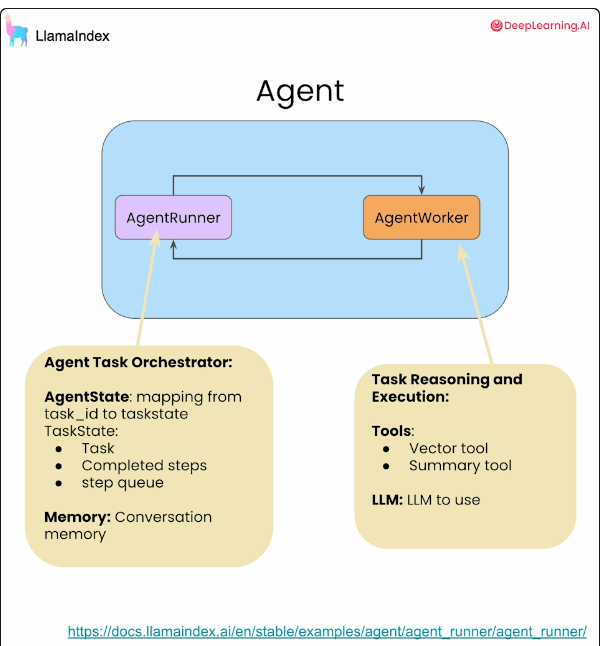

In [54]:
Image(filename="../../Imgs/20240516_201241.png")

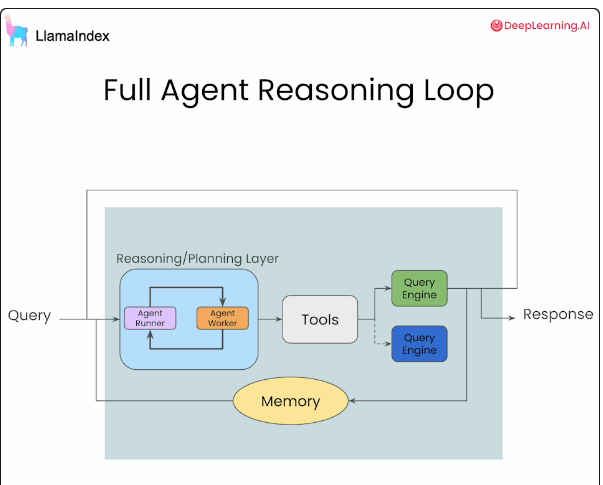

In [55]:
Image(filename="../../Imgs/20240516_201558.png")

In [ ]:
## Uncomment if not ran before
## vector_tool, summary_tool as defined before
#import nest_asyncio
#nest_asyncio.apply()

In [58]:
pip show llama-index-core llama-index-agent-openai

Name: llama-index-core
Version: 0.12.52.post1
Summary: Interface between LLMs and your data
Home-page: https://llamaindex.ai
Author: 
Author-email: Jerry Liu <jerry@llamaindex.ai>
License-Expression: MIT
Location: /home/renato/Documents/Repos/GenAI4Humanists/.venv/lib/python3.12/site-packages
Requires: aiohttp, aiosqlite, banks, dataclasses-json, deprecated, dirtyjson, filetype, fsspec, httpx, llama-index-workflows, nest-asyncio, networkx, nltk, numpy, pillow, platformdirs, pydantic, pyyaml, requests, setuptools, sqlalchemy, tenacity, tiktoken, tqdm, typing-extensions, typing-inspect, wrapt
Required-by: llama-cloud-services, llama-index, llama-index-agent-openai, llama-index-cli, llama-index-embeddings-adapter, llama-index-embeddings-huggingface, llama-index-embeddings-instructor, llama-index-embeddings-ollama, llama-index-embeddings-openai, llama-index-experimental, llama-index-finetuning, llama-index-indices-managed-llama-cloud, llama-index-llms-azure-openai, llama-index-llms-mistral

In [69]:
from llama_index.core.agent import ReActAgent
from llama_index.core.tools import QueryEngineTool

agent = ReActAgent(
    tools=[vector_tool, summary_tool],  # Explicitly named
    llm=llm,
    verbose=True
)

#### Let's make a two steps query

In [ ]:
response = agent.run(
    "What are the MetaGPT comparisons with ChatDev described on page 8,"
    "and how Agents communicate with other agents?"
)

2026-01-16 01:52:34,397 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-16 01:52:34,839 - INFO - Retrying request to /embeddings in 0.383161 seconds
2026-01-16 01:52:35,605 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2026-01-16 01:52:35,715 - INFO - Retrying request to /chat/completions in 0.423402 seconds
2026-01-16 01:53:00,218 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2026-01-16 01:53:00,612 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


In [73]:
print(response.source_nodes[0].get_content(metadata_mode="all"))

AttributeError: 'WorkflowHandler' object has no attribute 'source_nodes'

In [ ]:
response = agent.chat(
    "Tell me about the evaluation datasets used."
)

In [ ]:
response = agent.chat("Tell me the results over one of the above datasets.")

## Lower-Level: Debuggability and Control

In [ ]:
agent_worker = FunctionCallingAgentWorker.from_tools(
    [vector_tool, summary_tool], 
    llm=llm, 
    verbose=True
)
agent = AgentRunner(agent_worker)

In [ ]:
task = agent.create_task(
    "Tell me about the agent roles in MetaGPT, "
    "and then how they communicate with each other."
)

In [ ]:
step_output = agent.run_step(task.task_id)

In [ ]:
completed_steps = agent.get_completed_steps(task.task_id)
print(f"Num completed for task {task.task_id}: {len(completed_steps)}")
print(completed_steps[0].output.sources[0].raw_output)

In [ ]:
upcoming_steps = agent.get_upcoming_steps(task.task_id)
print(f"Num upcoming steps for task {task.task_id}: {len(upcoming_steps)}")
upcoming_steps[0]

### Inserting a new step in the task

In [ ]:
step_output = agent.run_step(
    task.task_id, input="What about how agents share information?"
)

In [ ]:
print(step_output.is_last)
#step_output = agent.run_step(task.task_id)   ##Error

In [ ]:
response = agent.finalize_response(task.task_id)

In [ ]:
print(str(response))

# 5th. Example - [Building a Multi-Document Agent](https://docs.llamaindex.ai/en/stable/examples/agent/multi_document_agents/)

In [ ]:
Image(filename="../../Imgs/20240516_230659.png") 

## Setup an Multi-Document Agent over 3 papers

In [ ]:
## Uncomment if not ran before
#import nest_asyncio
#nest_asyncio.apply()
#from llama_index.core import SimpleDirectoryReader, VectorStoreIndex, SummaryIndex
#from llama_index.core.node_parser import SentenceSplitter
#from llama_index.core.tools import FunctionTool, QueryEngineTool
#from llama_index.core.vector_stores import MetadataFilters, FilterCondition
from typing import List, Optional
from pathlib import Path

In [ ]:
def get_doc_tools(file_path: str, name: str,) -> str:
    """Get vector query and summary query tools from a document."""

    documents = SimpleDirectoryReader(input_files=[file_path]).load_data()
    splitter = SentenceSplitter(chunk_size=1024)
    nodes = splitter.get_nodes_from_documents(documents)
    vector_index = VectorStoreIndex(nodes)
    
    def vector_query(query: str, page_numbers: Optional[List[str]] = None) -> str:
        """Use to answer questions over a given paper.
    
        Useful if you have specific questions over the paper.
        Always leave page_numbers as None UNLESS there is a specific page you want to search for.
    
        Args:
            query (str): the string query to be embedded.
            page_numbers (Optional[List[str]]): Filter by set of pages. Leave as NONE 
                if we want to perform a vector search
                over all pages. Otherwise, filter by the set of specified pages.
        
        """
    
        page_numbers = page_numbers or []
        metadata_dicts = [{"key": "page_label", "value": p} for p in page_numbers]
        query_engine = vector_index.as_query_engine(similarity_top_k=2,
                                                    filters=MetadataFilters.from_dicts(metadata_dicts,
                                                                                       condition=FilterCondition.OR)
                                                   )
        response = query_engine.query(query)
        return response
    
    vector_query_tool = FunctionTool.from_defaults(name=f"vector_tool_{name}", fn=vector_query)
    
    summary_index = SummaryIndex(nodes)
    summary_query_engine = summary_index.as_query_engine(response_mode="tree_summarize",                                                  use_async=True,)
    summary_tool = QueryEngineTool.from_defaults(name=f"summary_tool_{name}",
                                                 query_engine=summary_query_engine,
                                                 description=(f"Useful for summarization questions related to {name}"),)

    return vector_query_tool, summary_tool

In [ ]:
docs = os.listdir(DOCS_DIR)
docs = [d for d in docs]
docs.sort()
print(f"Files in {DOCS_DIR}")
for doc in docs:
    print(doc)

In [ ]:
papers = [
    "../../Data/metagpt.pdf",
    "../../Data/longlora.pdf",
    "../../Data/selfrag.pdf",
]

In [ ]:
paper_to_tools_dict = {}
for paper in papers:
    print(f"Getting tools for paper: {paper}")
    vector_tool, summary_tool = get_doc_tools(paper, Path(paper).stem)
    paper_to_tools_dict[paper] = [vector_tool, summary_tool]

In [ ]:
initial_tools = [t for paper in papers for t in paper_to_tools_dict[paper]]
print(len(initial_tools))

In [ ]:
from llama_index.core.agent import FunctionCallingAgentWorker
from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    initial_tools, 
    llm=llm, 
    verbose=True
)
agent = AgentRunner(agent_worker)

In [ ]:
response = agent.query(
    "Tell me about the evaluation dataset used in LongLoRA, "
    "and then tell me about the evaluation results"
)

In [ ]:
response = agent.query("Give me a summary of both Self-RAG and LongLoRA")
print(str(response))

## Setup an Multi-Document Agent over 10 papers

In [ ]:
papers = [
    "../../Data/metagpt.pdf",
    "../../Data/longlora.pdf",
    "../../Data/loftq.pdf",
    "../../Data/swebench.pdf",
    "../../Data/selfrag.pdf",
    "../../Data/zipformer.pdf",
    "../../Data/values.pdf",
    "../../Data/knowledge_card.pdf",
    "../../Data/metra.pdf",
    "../../Data/vr_mcl.pdf"
]

In [ ]:
paper_to_tools_dict = {}
for paper in papers:
    print(f"Getting tools for paper: {paper}")
    vector_tool, summary_tool = get_doc_tools(paper, Path(paper).stem)
    paper_to_tools_dict[paper] = [vector_tool, summary_tool]

## Extend the Agent with Tool Retrieval

In [ ]:
all_tools = [t for paper in papers for t in paper_to_tools_dict[paper]]

### Define an "object" index and retriever over these tools

In [ ]:
#from llama_index.core import VectorStoreIndex
from llama_index.core.objects import ObjectIndex

obj_index = ObjectIndex.from_objects(
    all_tools,
    index_cls=VectorStoreIndex,
)

In [ ]:
obj_retriever = obj_index.as_retriever(similarity_top_k=3)

### The tools will be chosen by similarity

In [ ]:
tools = obj_retriever.retrieve(
    "Tell me about the eval dataset used in MetaGPT and SWE-Bench"
)

In [ ]:
for t in tools:
    print(t.metadata)

In [ ]:
#from llama_index.core.agent import FunctionCallingAgentWorker
#from llama_index.core.agent import AgentRunner

agent_worker = FunctionCallingAgentWorker.from_tools(
    tool_retriever=obj_retriever,
    llm=llm, 
    system_prompt=""" \
You are an agent designed to answer queries over a set of given papers.
Please always use the tools provided to answer a question. Do not rely on prior knowledge.\

""",
    verbose=True
)
agent = AgentRunner(agent_worker)

In [ ]:
response = agent.query(
    "Tell me about the evaluation dataset used "
    "in MetaGPT and compare it against SWE-Bench"
)
print(str(response))

In [ ]:
response = agent.query(
    "Compare and contrast the LoRA papers (LongLoRA, LoftQ). "
    "Analyze the approach in each paper first. "
)